In [1]:
import pandas as pd
from data_transform import DataTransform
from dataframeinfo import DataFrameInfo
from data_impute import impute_all_null_columns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

In [2]:
# Load Data
df = pd.read_csv("loan_payments.csv")
# Cast Datatypes
transformer = DataTransform()
df_info = DataFrameInfo(df)
df = transformer.encode_transform(df)
df = transformer.transform_digit_string(df)
df = transformer.cast_column_dtypes(df)

id --> int32
member_id --> int32
loan_amount --> int32
funded_amount --> float32
funded_amount_inv --> float32
term --> int32
int_rate --> float32
instalment --> float32
grade --> category
sub_grade --> category
employment_length --> int32
home_ownership --> category
annual_inc --> float32
verification_status --> category
issue_date --> date
loan_status --> category
payment_plan --> category
purpose --> category
dti --> float32
delinq_2yrs --> int32
earliest_credit_line --> date
inq_last_6mths --> int32
mths_since_last_delinq --> int32
mths_since_last_record --> int32
open_accounts --> int32
total_accounts --> int32
out_prncp --> float32
out_prncp_inv --> float32
total_payment --> float32
total_payment_inv --> float32
total_rec_prncp --> float32
total_rec_int --> float32
total_rec_late_fee --> float32
recoveries --> float32
collection_recovery_fee --> float32
last_payment_date --> date
last_payment_amount --> float32
next_payment_date --> date
last_credit_pull_date --> date
collections

In [3]:
df = impute_all_null_columns(df)

                             number of nulls  percentage of nulls  \
funded_amount                           3007                 5.54   
term                                    4772                 8.80   
int_rate                                5169                 9.53   
employment_length                       2118                 3.91   
mths_since_last_delinq                 31002                57.17   
mths_since_last_record                 48050                88.60   
last_payment_date                         73                 0.13   
next_payment_date                      32608                60.13   
last_credit_pull_date                      7                 0.01   
collections_12_mths_ex_med                51                 0.09   
mths_since_last_major_derog            46732                86.17   

                             percentage of non-nulls  
funded_amount                                  94.46  
term                                           91.20  
int_ra

In [4]:
data_info = DataFrameInfo(df)
cat_columns = data_info.list_categorical_columns(True)
print(cat_columns)

['verification_status', 'loan_status', 'payment_plan', 'purpose', 'application_type']


In [5]:
num_columns = data_info.list_numerical_columns(True)
print(num_columns)

['loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'employment_length', 'annual_inc', 'issue_date', 'dti', 'delinq_2yrs', 'earliest_credit_line', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_date', 'last_payment_amount', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'policy_code']


In [6]:
print(len(num_columns) + len(cat_columns))
print(len(df.columns))

34
40


In [7]:
datetime_cols = data_info.list_datetime_columns()
datetime_df = df[datetime_cols]

In [8]:
print(datetime_df)

      issue_date earliest_credit_line last_payment_date last_credit_pull_date
0     2021-01-01           1987-10-01        2022-01-01            2022-01-01
1     2021-01-01           2001-09-01        2022-01-01            2022-01-01
2     2021-01-01           1998-09-01        2021-10-01            2021-10-01
3     2021-01-01           2008-06-01        2021-06-01            2021-06-01
4     2021-01-01           2002-04-01        2022-01-01            2022-01-01
...          ...                  ...               ...                   ...
54226 2013-07-01           2003-04-01        2016-07-01            2016-07-01
54227 2013-10-01           1999-01-01        2016-10-01            2016-09-01
54228 2013-08-01           1984-02-01        2016-09-01            2013-05-01
54229 2013-08-01           1995-03-01        2014-03-01            2013-05-01
54230 2013-07-01           1998-10-01        2014-03-01            2015-01-01

[54231 rows x 4 columns]


In [9]:
num_columns = [column for column in num_columns if column not in datetime_cols]

In [10]:
print(num_columns)

['loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'employment_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med', 'policy_code']


In [11]:
for column in num_columns:
    print(column, df[column].skew())

loan_amount 0.8052592257800115
funded_amount 0.84556293
funded_amount_inv 0.8139274
term 1.1483575
int_rate 0.4331925
instalment 0.99698156
employment_length 0.6764905
annual_inc 8.71183
dti 0.18941957
delinq_2yrs 5.370001885877136
inq_last_6mths 3.248918364007299
open_accounts 1.0592820053165104
total_accounts 0.7790139244121327
out_prncp 2.3564262
out_prncp_inv 2.3568475
total_payment 1.2678912
total_payment_inv 1.2561967
total_rec_prncp 1.2610146
total_rec_int 2.204322
total_rec_late_fee 13.184304
recoveries 14.589793
collection_recovery_fee 27.636843
last_payment_amount 2.499381
collections_12_mths_ex_med 20.262375
policy_code 0


/tmp/ipykernel_142397/3307739546.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[num_columns].hist(ax=ax, color = "skyblue", edgecolor = "gold")


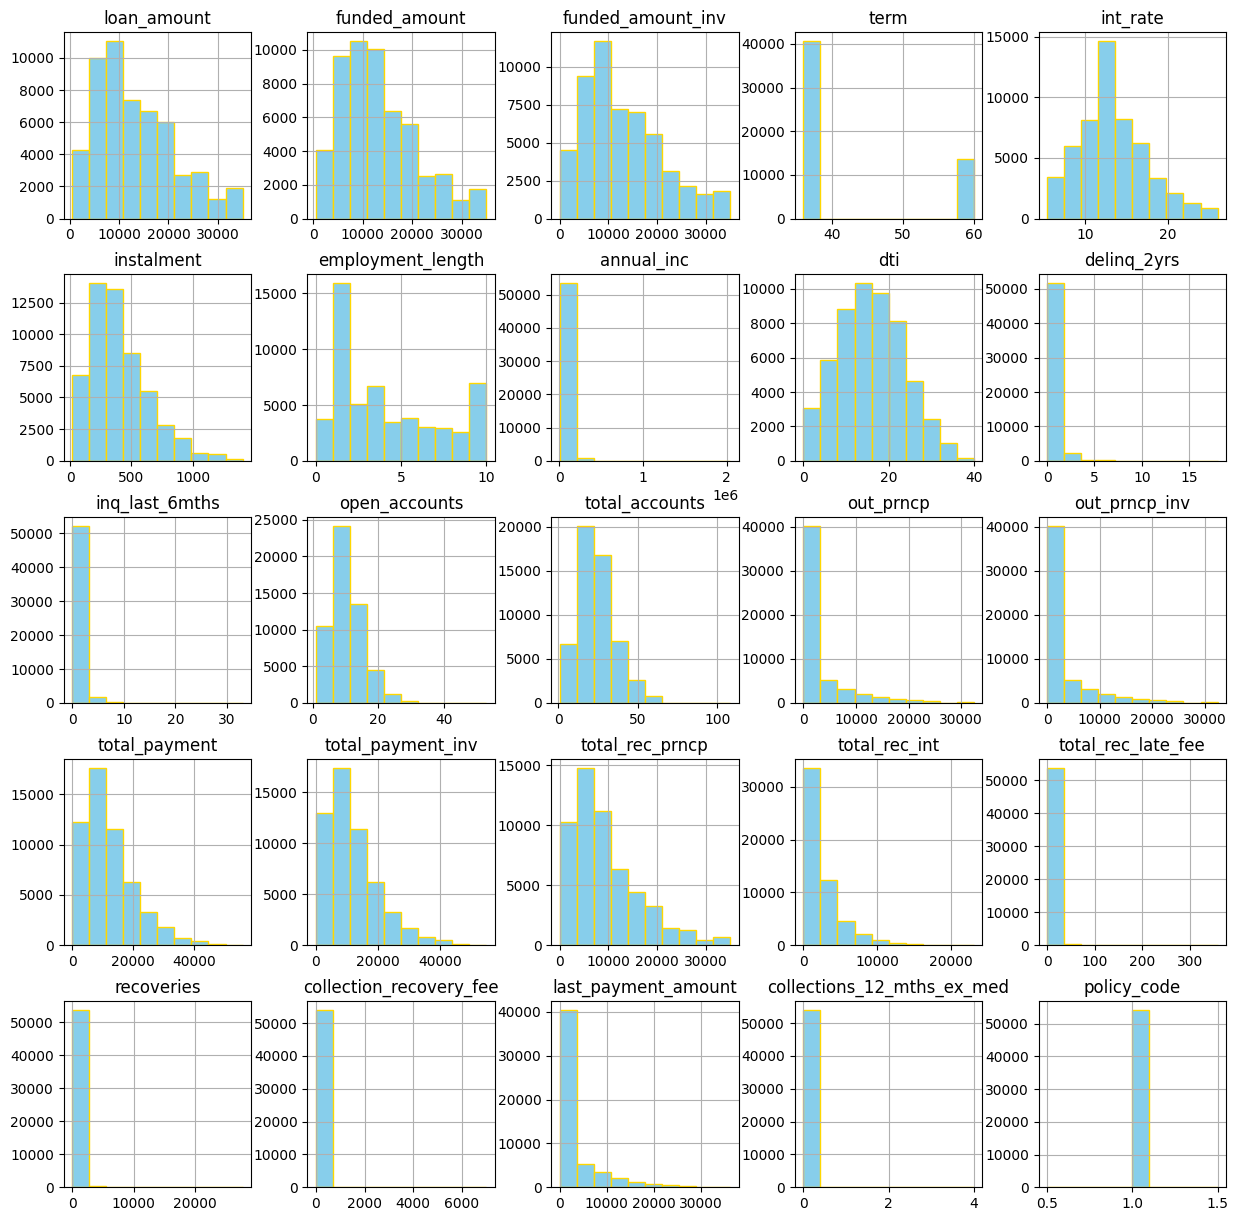

In [12]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df[num_columns].hist(ax=ax, color = "skyblue", edgecolor = "gold")
plt.show()


In [13]:
#COLUMNS THAT ARE SKEWED UNDER OR OVER 1:
# under 1
less_than_1 = [column for column in num_columns if df[column].skew() < 1]
# 1 and over
over_1 = [column for column in num_columns if df[column].skew() >= 1]

loan_amount: 
	0.8052592257800115
funded_amount: 
	0.8455629348754883
funded_amount_inv: 
	0.813927412033081
int_rate: 
	0.43319249153137207
instalment: 
	0.9969815611839294
employment_length: 
	0.6764904856681824
dti: 
	0.18941956758499146
total_accounts: 
	0.7790139244121327
policy_code: 
	0


/tmp/ipykernel_142397/1930027144.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[less_than_1].hist(ax=ax, color = "skyblue", edgecolor = "gold")


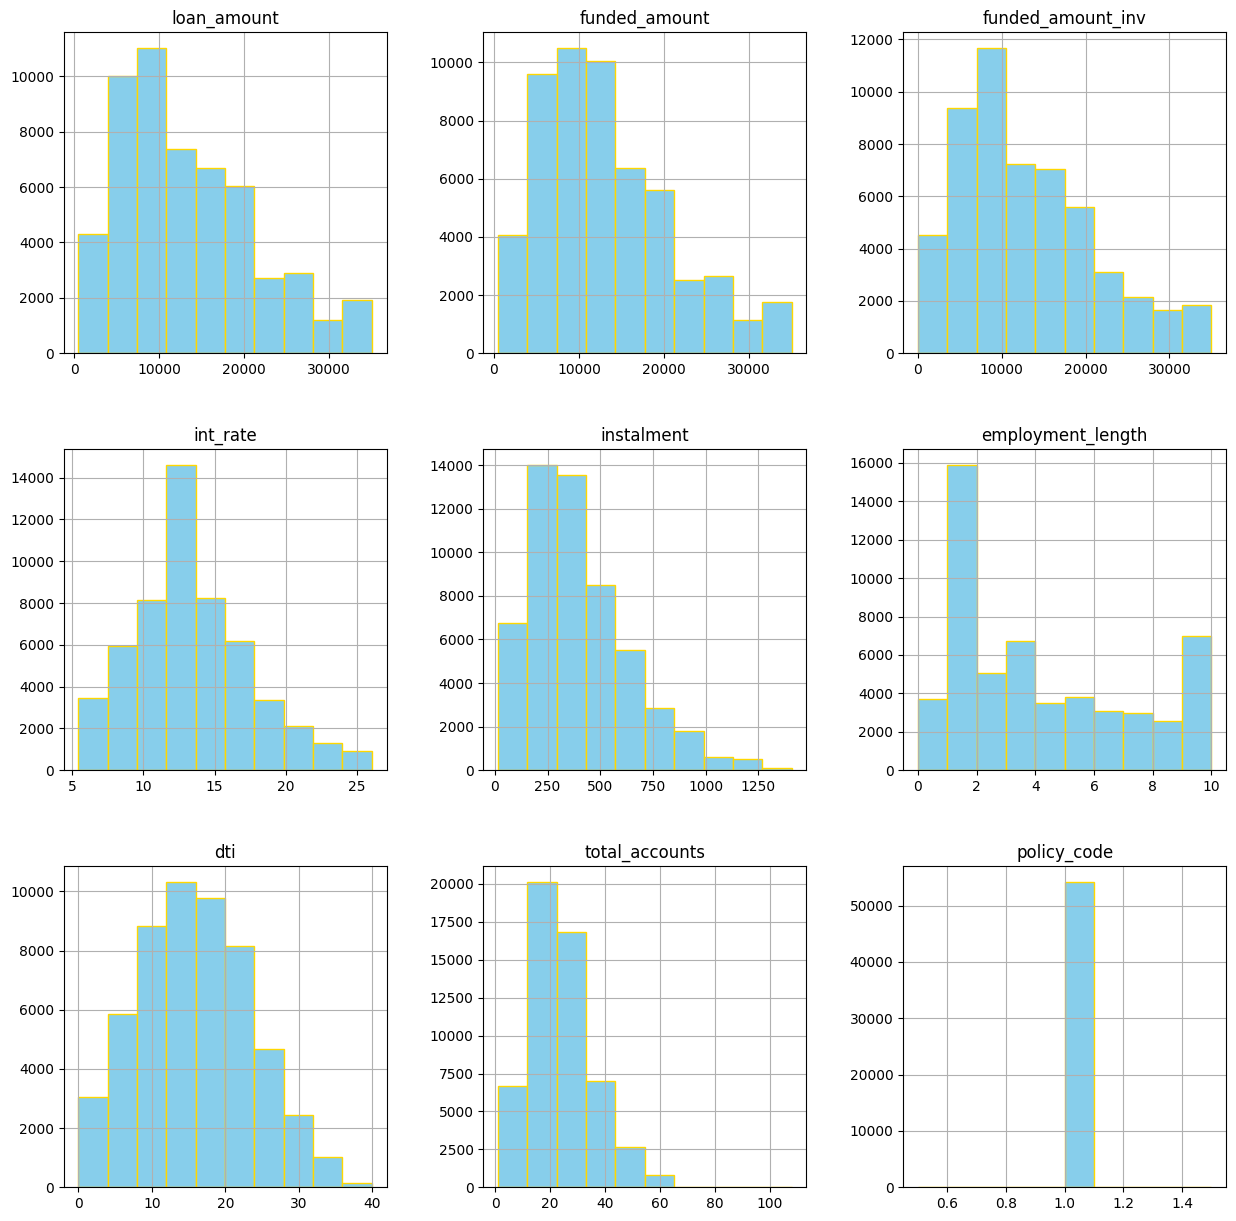

In [14]:
# under 1 HISTOGRAMS

for column in less_than_1:
    print(f'{column}: \n\t{df[column].skew()}') 

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df[less_than_1].hist(ax=ax, color = "skyblue", edgecolor = "gold")
plt.show()

term: 
	1.1483575105667114
annual_inc: 
	8.711830139160156
delinq_2yrs: 
	5.370001885877136
inq_last_6mths: 
	3.248918364007299
open_accounts: 
	1.0592820053165104
out_prncp: 
	2.356426239013672
out_prncp_inv: 
	2.3568475246429443
total_payment: 
	1.2678911685943604
total_payment_inv: 
	1.2561967372894287
total_rec_prncp: 
	1.2610145807266235
total_rec_int: 
	2.204322099685669
total_rec_late_fee: 
	13.184304237365723
recoveries: 
	14.58979320526123
collection_recovery_fee: 
	27.636842727661133
last_payment_amount: 
	2.4993810653686523
collections_12_mths_ex_med: 
	20.262374877929688


/tmp/ipykernel_142397/1255851997.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[over_1].hist(ax=ax, color = "skyblue", edgecolor = "gold")


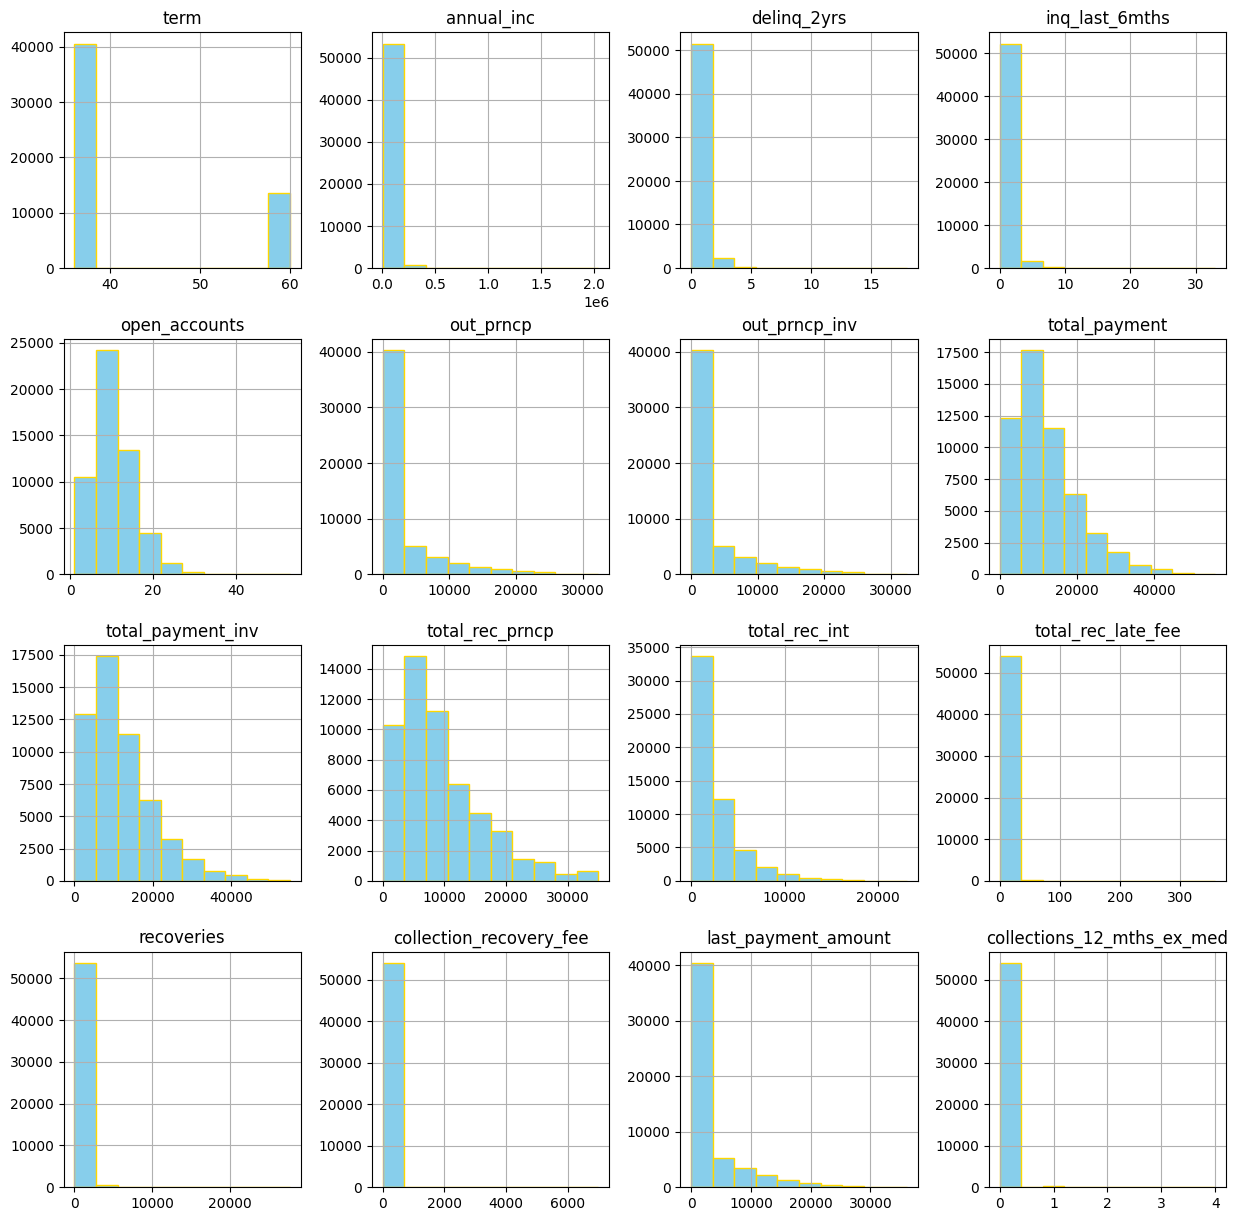

In [15]:
# 1 and over HISTOGRAMS

for column in over_1:
    print(f'{column}: \n\t{df[column].skew()}') 

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df[over_1].hist(ax=ax, color = "skyblue", edgecolor = "gold")
plt.show()

/home/van28/.conda/envs/my_env/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:282: RuntimeWarning: divide by zero encountered in divide
  return (self.sorted_data - self.loc) / self.scale
/home/van28/.conda/envs/my_env/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:282: RuntimeWarning: invalid value encountered in divide
  return (self.sorted_data - self.loc) / self.scale


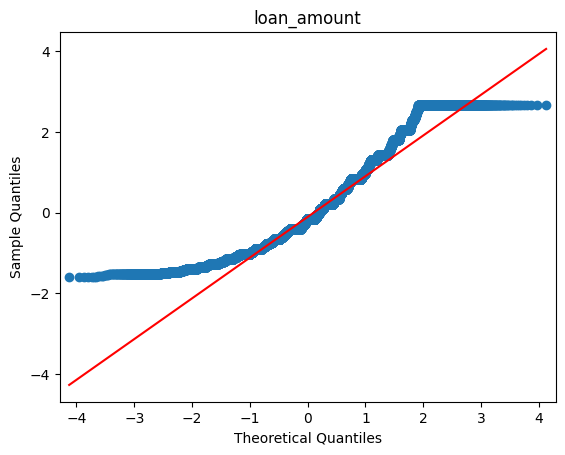

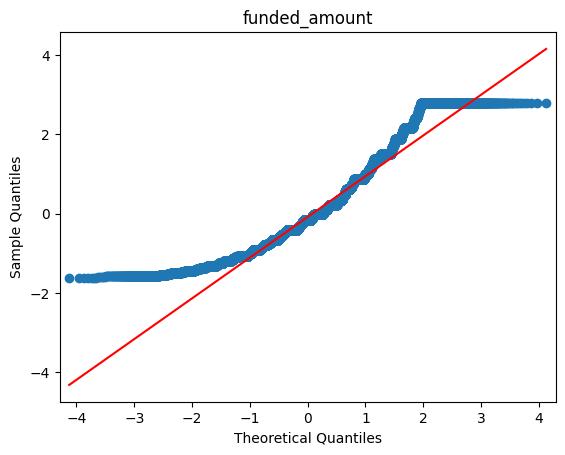

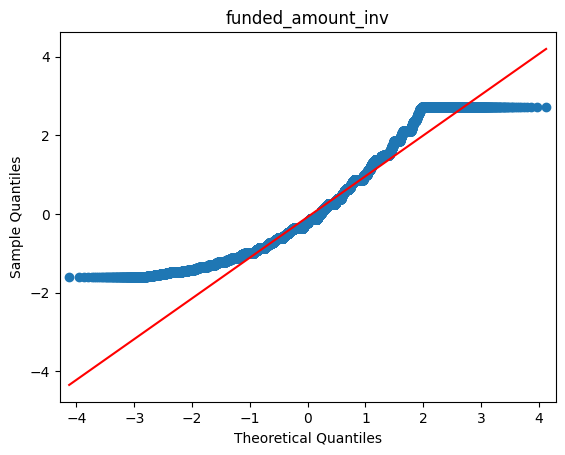

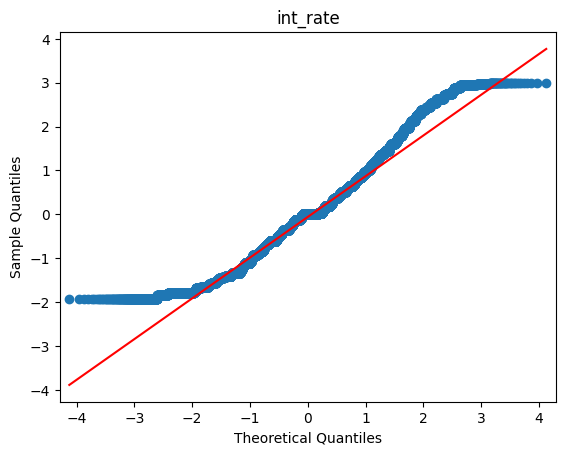

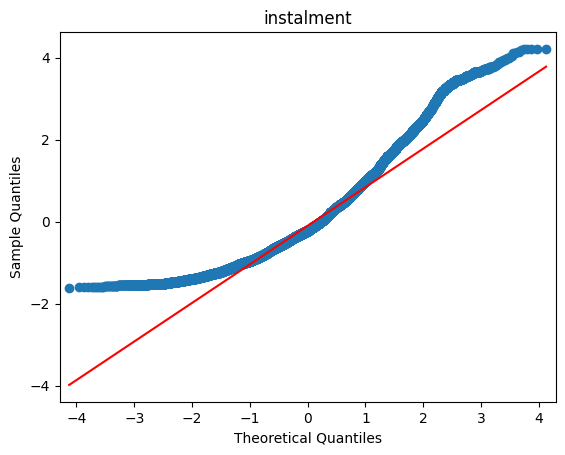

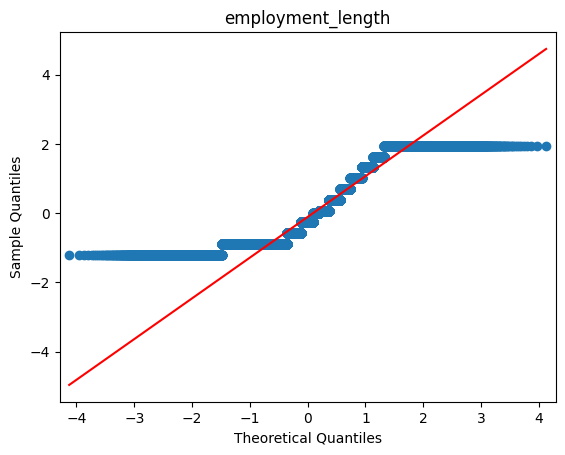

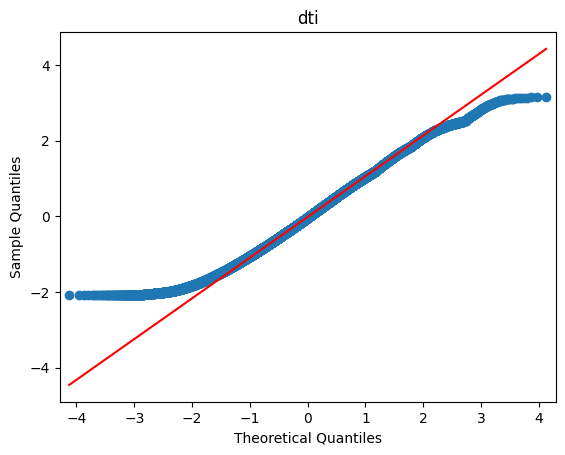

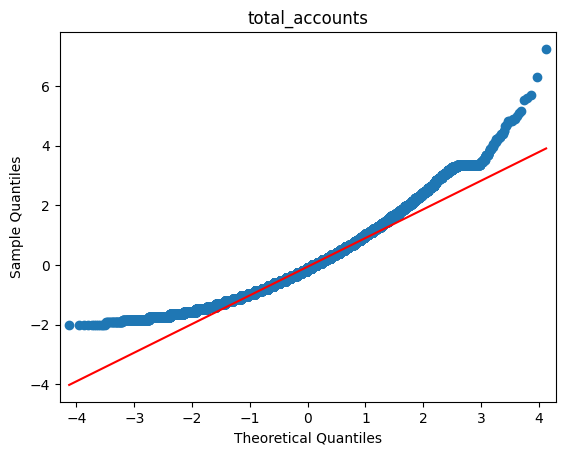

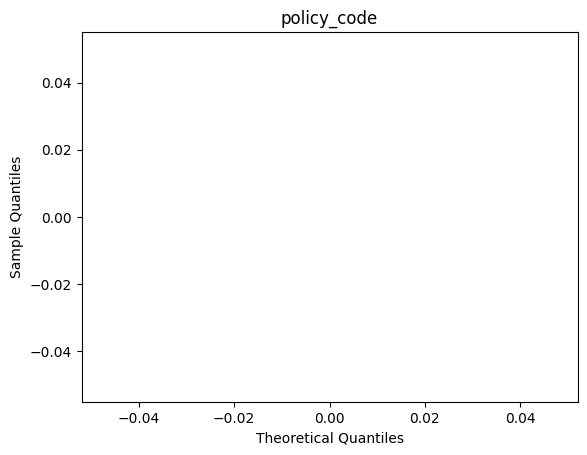

In [16]:
# under 1 HISTOGRAMS
for column in less_than_1:
    qqplot(df[column],line='q', fit=True)
    plt.title(column)


In [17]:
print(over_1)

['term', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']


In [18]:
print(less_than_1)

['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'employment_length', 'dti', 'total_accounts', 'policy_code']


## Non-skewed Columns:

- dti

## Skewed Columns:

### Less than 1

- loan_amount 
- funded_amount 
- funded_amount_inv 
- int_rate 
- instalment 
- employment_length
- total_accounts 
- policy_code

### Over 1
- term
- annual_inc
- delinq_2yrs
- inq_last_6mths
- open_accounts
- out_prncp
- out_prncp_inv
- total_payment
- total_payment_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_payment_amount
- collections_12_mths_ex_med

# Decision: Skew with over 1 will not be transformed.

Why?
- They tend to be overly positively skewed and therefore unlikely to follow a natural normal distibution pattern.

## Decision: Skewed Columns (less than 1) to NOT transform (with reason)

- total_accounts: Not much distirbution going on i.e., the range is narrowed
- employment_length: Two peaks indicating that it doesn't naturally follow normal distribution
- policy_code: single  value

## Decision: Skewed Columns to transform 
- loan_amount 
- funded_amount 
- funded_amount_inv 
- int_rate 
- instalment 

## Transforms to implement:
- Log Transform
- Box-Cox Transform
- Yeo-Johnson

In [56]:
from scipy.stats import boxcox
from scipy.stats import yeojohnson
import numpy as np

In [46]:
columns_to_transform = ['loan_amount', 'funded_amount','funded_amount_inv','int_rate','instalment']

In [60]:
log_results = []
boxcox_results = []
yeojohnson_results = []

log_arrays = []
boxcox_arrays = []
yeojohnson_arrays = []

for column in columns_to_transform:
    log_array = df[column].map(lambda i: np.log(i) if i > 0 else 0)
    log_arrays.append(log_array)
    log_results.append(log_array.skew())

    boxcox_array = df[column] +1
    boxcox_array = boxcox(boxcox_array)
    boxcox_array = pd.Series(boxcox_array[0])
    boxcox_arrays.append(boxcox_array)
    boxcox_results.append(boxcox_array.skew()) 

    yeojohnson_array = df[column]
    yeojohnson_array = yeojohnson(yeojohnson_array)
    yeojohnson_array = pd.Series(yeojohnson_array[0])
    yeojohnson_arrays.append(yeojohnson_array)
    yeojohnson_results.append(yeojohnson_array.skew())



/home/van28/.conda/envs/my_env/lib/python3.11/site-packages/numpy/core/_methods.py:152: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/home/van28/.conda/envs/my_env/lib/python3.11/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/van28/.conda/envs/my_env/lib/python3.11/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/home/van28/.conda/envs/my_env/lib/python3.11/site-packages/scipy/optimize/_optimize.py:2488: RuntimeWarning: invalid value encountered in scalar multiply
  tmp2 = (x - v) * (fx - fw)


In [61]:
print(f"{log_results} \n {boxcox_results} \n {yeojohnson_results} ")


[-0.6774872814309607, -0.7376500865398391, -4.3451915152986835, -0.4004921929919291, -0.6678200073906861] 
 [-0.043151419272494766, -0.034223605, -0.036331724, -0.012103327, -0.020674653] 
 [-0.04315141927249605, -0.03380541, -0.035900716, -0.01208169, -0.021265198] 


In [71]:
for column, array in zip(columns_to_transform, log_arrays): 
    print(array)
    print(df[column])

0        8.987197
1        9.487972
2        9.680344
3        9.615805
4        9.615805
           ...   
54226    8.517193
54227    8.517193
54228    8.160518
54229    8.517193
54230    8.517193
Name: loan_amount, Length: 54231, dtype: float64
0         8000
1        13200
2        16000
3        15000
4        15000
         ...  
54226     5000
54227     5000
54228     3500
54229     5000
54230     5000
Name: loan_amount, Length: 54231, dtype: int32
0        8.987197
1        9.487972
2        9.680344
3        9.615805
4        9.615805
           ...   
54226    8.517193
54227    8.517193
54228    8.160518
54229    8.517193
54230    8.517193
Name: funded_amount, Length: 54231, dtype: float64
0         8000.0
1        13200.0
2        16000.0
3        15000.0
4        15000.0
          ...   
54226     5000.0
54227     5000.0
54228     3500.0
54229     5000.0
54230     5000.0
Name: funded_amount, Length: 54231, dtype: float32
0        8.987197
1        9.487972
2        9.680344


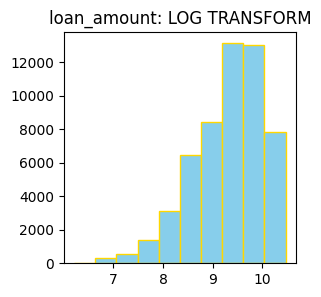

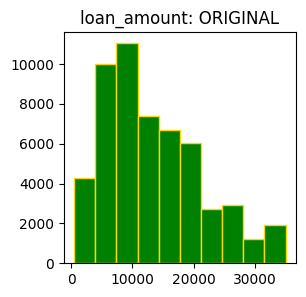

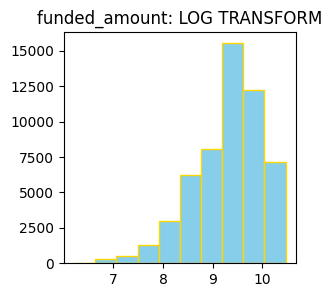

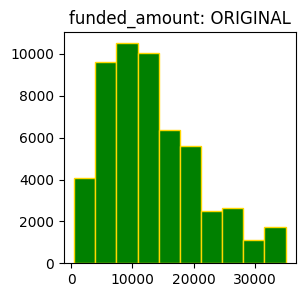

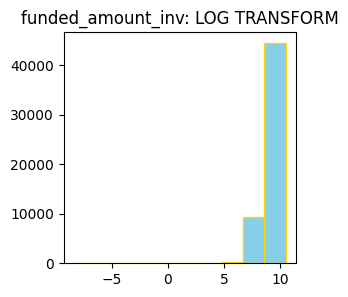

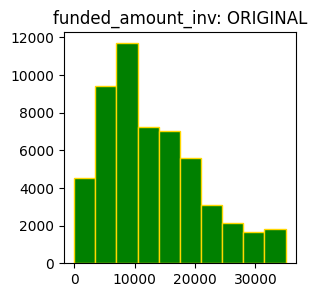

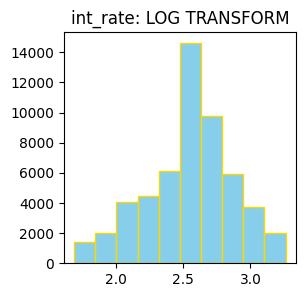

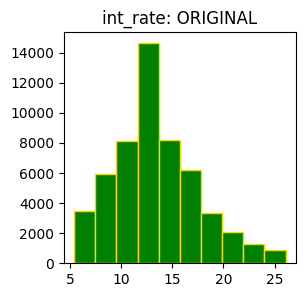

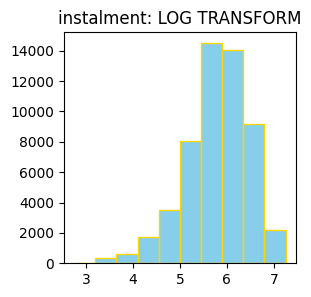

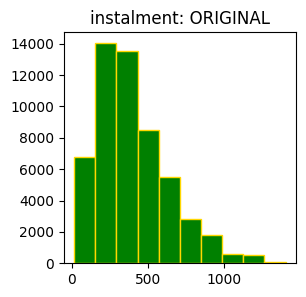

In [102]:
# POST TRANSFORMATION HISTOGRAMS
# LOG TRANSFORM HISTOGRAMS

for column, array in zip(columns_to_transform, log_arrays): 
    
    plt.figure(figsize=[3,3])
    plt.hist(array, color = "skyblue", edgecolor = "gold")
    plt.title(f"{column}: LOG TRANSFORM")
    plt.show()

    plt.figure(figsize=[3,3])
    plt.hist(df[column],color = "green", edgecolor = "gold")
    plt.title(f"{column}: ORIGINAL")
    plt.show()

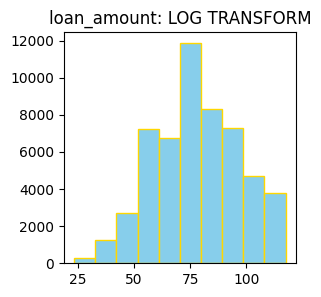

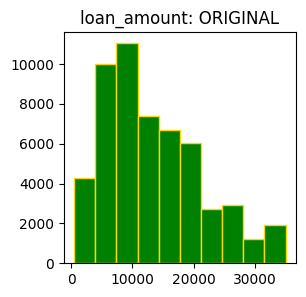

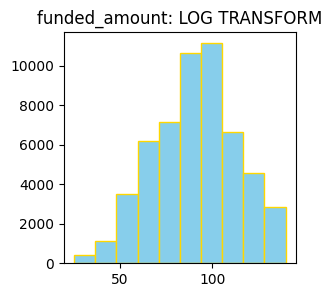

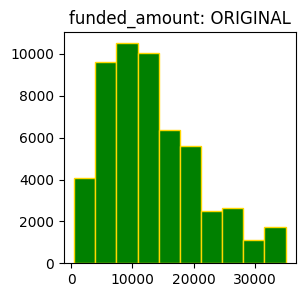

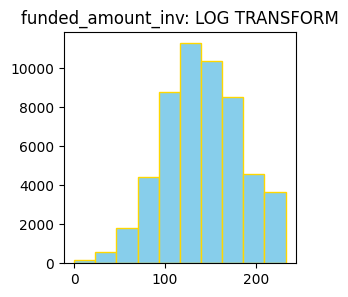

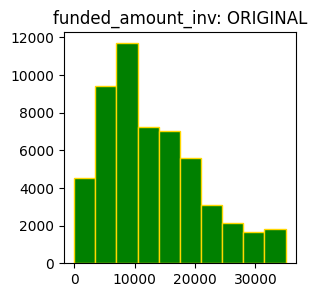

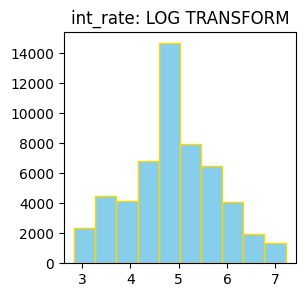

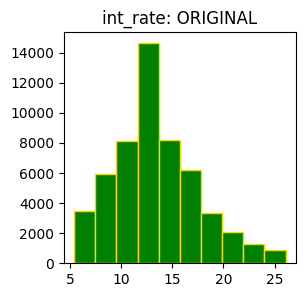

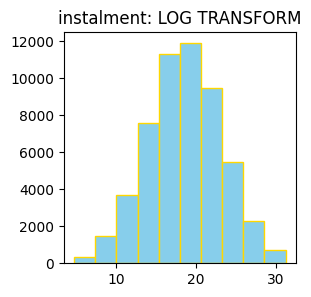

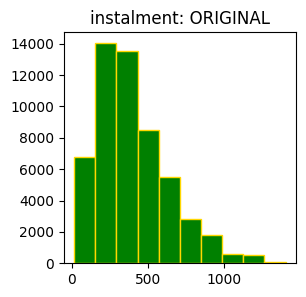

In [104]:
# POST TRANSFORMATION HISTOGRAMS
# BOXCOX TRANSFORM HISTOGRAMS

for column, array in zip(columns_to_transform, boxcox_arrays): 
    
    plt.figure(figsize=[3,3])
    plt.hist(array, color = "skyblue", edgecolor = "gold")
    plt.title(f"{column}: LOG TRANSFORM")
    plt.show()

    plt.figure(figsize=[3,3])
    plt.hist(df[column],color = "green", edgecolor = "gold")
    plt.title(f"{column}: ORIGINAL")
    plt.show()

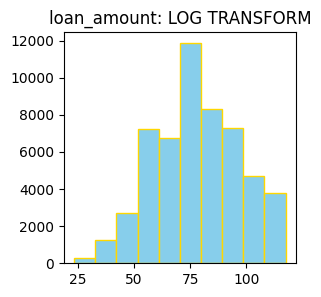

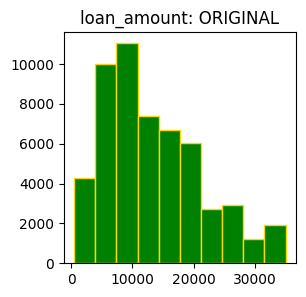

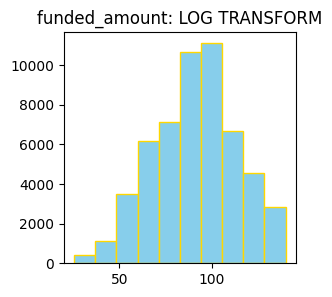

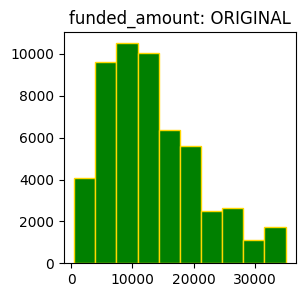

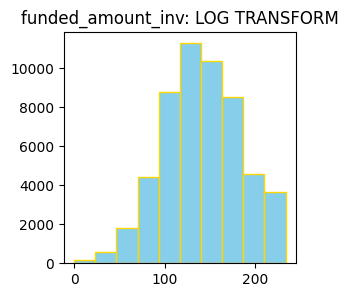

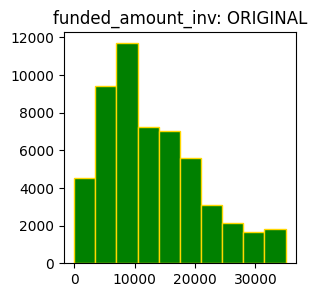

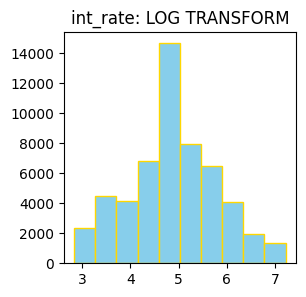

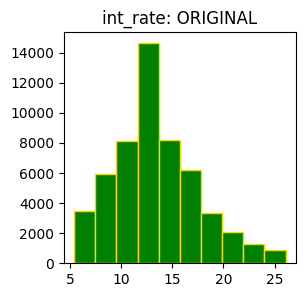

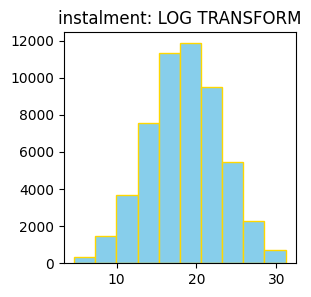

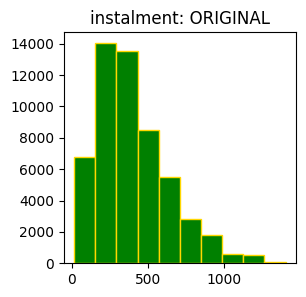

In [103]:
# POST TRANSFORMATION HISTOGRAMS
# YEOJOHNSON TRANSFORM HISTOGRAMS

for column, array in zip(columns_to_transform, yeojohnson_arrays): 
    
    plt.figure(figsize=[3,3])
    plt.hist(array, color = "skyblue", edgecolor = "gold")
    plt.title(f"{column}: LOG TRANSFORM")
    plt.show()

    plt.figure(figsize=[3,3])
    plt.hist(df[column],color = "green", edgecolor = "gold")
    plt.title(f"{column}: ORIGINAL")
    plt.show()